## Limpando o dataset para a classificação não supervisionada

In [15]:
import pandas as pd
import numpy as np
import os
import openai
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [16]:
df = pd.read_csv(f'obesity-classification-dataset/Obesity Classification.csv')
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [17]:
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [18]:
labels = df['Label']
labels

0      Normal Weight
1      Normal Weight
2         Overweight
3        Underweight
4              Obese
           ...      
103      Underweight
104      Underweight
105      Underweight
106      Underweight
107      Underweight
Name: Label, Length: 108, dtype: object

In [19]:
train_df = df.drop(columns=['Label', 'ID'])
train_df

,Age,Gender,Height,Weight,BMI
0,25,Male,175,80,25.3
1,30,Female,160,60,22.5
2,35,Male,180,90,27.3
3,40,Female,150,50,20.0
4,45,Male,190,100,31.2
...,...,...,...,...,...
103,11,Male,175,10,3.9
104,16,Female,160,10,3.9
105,21,Male,180,15,5.6
106,26,Female,150,15,5.6


In [20]:
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)
label_legend = {index: label for index, label in enumerate(label_encoder.classes_)}
df['Numeric_Label'] = numeric_labels

numeric_gender = label_encoder.fit_transform(df['Gender'])
gender_legend = {index: label for index, label in enumerate(label_encoder.classes_)}
train_df['Gender'] = numeric_gender

In [7]:
print(f'labels legend: {label_legend} || numeric labels: {numeric_labels} || gender legend: {gender_legend} || numeric gender : {numeric_gender}')

labels legend: {0: 'Normal Weight', 1: 'Obese', 2: 'Overweight', 3: 'Underweight'} || numeric labels: [0 0 2 3 1 3 1 3 1 3 0 3 0 0 2 3 1 3 1 3 0 0 2 3 1 3 1 3 1 0 0 2 2 2 1 2 1
 2 0 3 0 0 2 0 2 2 1 2 0 3 0 0 2 0 2 2 1 2 0 3 0 3 0 0 2 0 2 2 3 3 0 3 0 3
 0 0 2 0 3 3 3 3 0 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3] || gender legend: {0: 'Female', 1: 'Male'} || numeric gender : [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


## Treinando o modelo de classificação

In [21]:
data_train = np.array(train_df)
classes = np.array(numeric_labels)

train_X, test_X, train_y, test_y = train_test_split(data_train, classes, test_size=0.2, random_state=42)
modelo = RandomForestClassifier(n_estimators=10, random_state=42)
cross_val_scores = cross_val_score(modelo, train_X, train_y, cv=5)
modelo.fit(train_X, train_y)
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(test_X)

# Avaliar o modelo
accuracy = modelo.score(test_X, test_y)
print(f"Acurácia teste: {accuracy:.4f}")
print(f'Cross-Validation Scores: {cross_val_scores}')

Acurácia teste: 0.9545
Cross-Validation Scores: [0.94444444 0.88235294 0.94117647 1.         0.94117647]


In [22]:
modelo_unsupervised = KMeans(n_clusters=4, random_state=42)
modelo_unsupervised.fit(data_train)

KMeans(n_clusters=4, random_state=42)

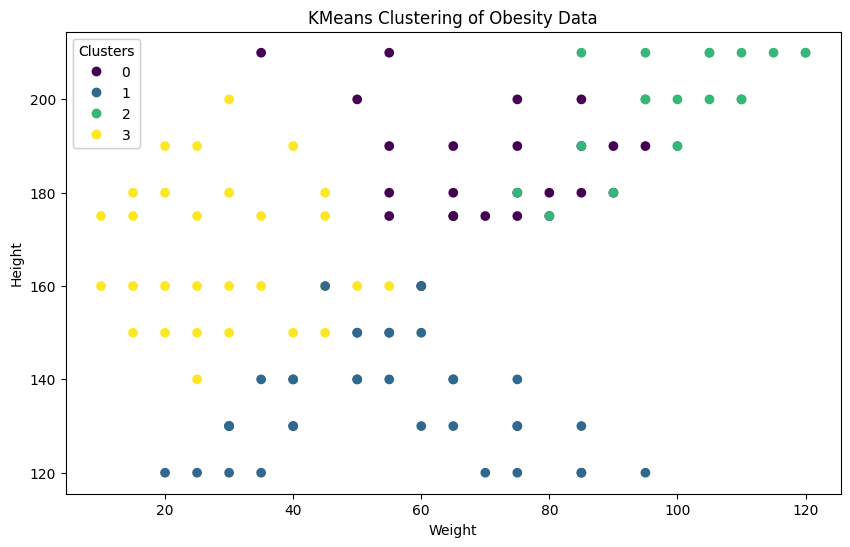

In [31]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_df['Weight'], train_df['Height'], c=modelo_unsupervised.labels_, cmap='viridis')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('KMeans Clustering of Obesity Data')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

In [28]:
cluster_df = train_df

cluster_df['Cluster'] = modelo_unsupervised.labels_

gender_mapping = {0: 'Female', 1: 'Male'}

cluster_df['Gender'] = cluster_df['Gender'].map(gender_mapping)

cluster_0 = cluster_df[cluster_df['Cluster'] == 0]
cluster_1 = cluster_df[cluster_df['Cluster'] == 1]
cluster_2 = cluster_df[cluster_df['Cluster'] == 2]
cluster_3 = cluster_df[cluster_df['Cluster'] == 3]

In [29]:
cluster_0_json = cluster_0.to_json(orient='records')
cluster_1_json = cluster_1.to_json(orient='records')
cluster_2_json = cluster_2.to_json(orient='records')
cluster_3_json = cluster_3.to_json(orient='records')

In [30]:
cluster_0_json

'[{"Age":25,"Gender":"Male","Height":175,"Weight":80,"BMI":25.3,"Cluster":0},{"Age":30,"Gender":"Female","Height":160,"Weight":60,"BMI":22.5,"Cluster":0},{"Age":35,"Gender":"Male","Height":180,"Weight":90,"BMI":27.3,"Cluster":0},{"Age":18,"Gender":"Male","Height":175,"Weight":70,"BMI":23.4,"Cluster":0},{"Age":28,"Gender":"Male","Height":180,"Weight":80,"BMI":25.3,"Cluster":0},{"Age":38,"Gender":"Male","Height":190,"Weight":90,"BMI":27.3,"Cluster":0},{"Age":19,"Gender":"Male","Height":175,"Weight":75,"BMI":24.2,"Cluster":0},{"Age":29,"Gender":"Male","Height":180,"Weight":85,"BMI":26.1,"Cluster":0},{"Age":39,"Gender":"Male","Height":190,"Weight":95,"BMI":27.0,"Cluster":0},{"Age":17,"Gender":"Male","Height":175,"Weight":65,"BMI":22.7,"Cluster":0},{"Age":27,"Gender":"Male","Height":180,"Weight":75,"BMI":24.2,"Cluster":0},{"Age":37,"Gender":"Male","Height":190,"Weight":85,"BMI":26.1,"Cluster":0},{"Age":67,"Gender":"Male","Height":175,"Weight":65,"BMI":22.7,"Cluster":0},{"Age":16,"Gender":"M

In [ ]:
client = openai.OpenAI(
    organization='org-8Q6LduybHrpbAdbT9yJUJDQA',
    project='proj_DjkXbEEukpsg44dLeabG1ZyP',
    api_key=os.environ.get('MY_OPENAI_KEY')
)

def generateResponseLLM(model: str, messages: object , max_tokens: int) -> str:
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        max_tokens=max_tokens
    )
    return response.choices[0].message.content

# Configurar a chave da OpenAI (pode ser via variável de ambiente)
OPENAI_API_KEY = os.getenv("MY_OPENAI_KEY")

In [ ]:
prompt = """
Você é um especialista em análise de dados e machine learning. Recebi um conjunto de dados que foi segmentado em grupos utilizando um algoritmo de clustering não supervisionado. Cada grupo contém observações com características semelhantes, mas ainda não sabemos a que classificação cada um se encaixa.

A seguir, apresento a lista das possíveis classificações:

[Classificação 1]

[Classificação 2]

[Classificação 3]

[Classificação 4]

Além disso, para cada grupo, disponibilizarei os dados no formato JSON conforme o exemplo abaixo:

Grupo 1: JSON1

Grupo 2: JSON2

Grupo 3: JSON3

Grupo 4: JSON4

Sua tarefa é analisar as características presentes em cada JSON (dados de cada grupo) e, com base nessas informações e na lista de classificações fornecida, atribuir a cada grupo a classificação que melhor o representa. Para cada grupo, por favor, inclua:

A classificação escolhida.

Uma breve justificativa explicando a relação entre as características do grupo e a classificação atribuída.

Por favor, apresente os resultados de forma organizada, indicando claramente a qual grupo se refere cada resposta.
"""